In [1]:
import pandas as pd


In [2]:

data=pd.read_csv("C:/Users/aarsh/OneDrive/Desktop/movies.csv")

In [3]:
data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
data.shape


(9742, 3)

In [9]:
data1=pd.read_csv("C:/Users/aarsh/OneDrive/Desktop/ratings.csv")

In [10]:
data1.shape

(100836, 4)

In [12]:
# Find the number of unique userId values
unique_user_ids = data1['userId'].nunique()
unique_user_ids

610

In [19]:
# Group by 'movieId' and count the number of ratings for each movie
movie_ratings_count = data.groupby('movieId').size()

# Find the movie with the maximum number of ratings
max_rated_movie_id = movie_ratings_count.idxmax()
max_ratings = movie_ratings_count.max()

print(f'Movie ID {max_rated_movie_id} has received the maximum number of ratings: {max_ratings}.')

Movie ID 1 has received the maximum number of ratings: 1.


In [20]:
# Merge with the movie title
max_rated_movie_title = data.loc[data['movieId'] == max_rated_movie_id, 'title'].values[0]

print(f'The movie with the maximum number of ratings is "{max_rated_movie_title}" with {max_ratings} ratings.')

The movie with the maximum number of ratings is "Toy Story (1995)" with 1 ratings.


In [18]:
data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [27]:
# Load the movies and tags CSV files
movies_df = pd.read_csv('C:/Users/aarsh/OneDrive/Desktop/movies.csv')
tags_df = pd.read_csv('C:/Users/aarsh/OneDrive/Desktop/tags.csv')

# Find the movieId for "Matrix, The (1999)"
matrix_movie_id = movies_df.loc[movies_df['title'] == 'Matrix, The (1999)', 'movieId'].values[0]

# Filter the tags submitted for this movie
matrix_tags = tags_df[tags_df['movieId'] == matrix_movie_id]

# Get all unique tags submitted by users
unique_tags = matrix_tags['tag'].unique()

print(f'All tags submitted for "Matrix, The (1999)": {unique_tags}')

All tags submitted for "Matrix, The (1999)": ['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


In [28]:
# Find the movieId for "Terminator 2: Judgment Day (1991)"
terminator_movie_id = movies_df.loc[movies_df['title'] == 'Terminator 2: Judgment Day (1991)', 'movieId'].values[0]

# Filter the ratings for this movie
terminator_ratings = data1[data1['movieId'] == terminator_movie_id]

# Calculate the average rating
average_rating = terminator_ratings['rating'].mean()

print(f'The average user rating for "Terminator 2: Judgment Day (1991)" is {average_rating:.2f}.')

The average user rating for "Terminator 2: Judgment Day (1991)" is 3.97.


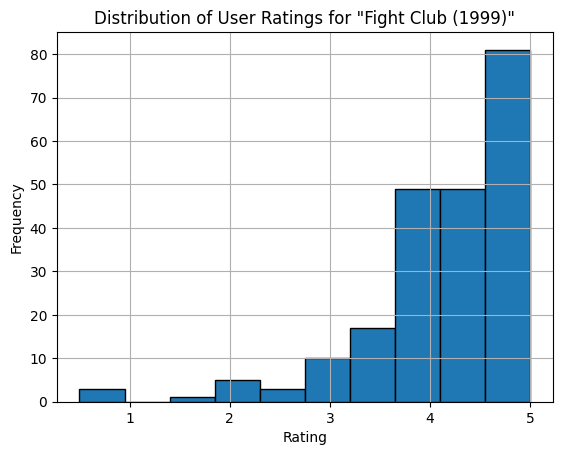

In [31]:
4
import matplotlib.pyplot as plt# Find the movieId for "Fight Club (1999)"
fight_club_movie_id = movies_df.loc[movies_df['title'] == 'Fight Club (1999)', 'movieId'].values[0]

# Filter the ratings for this movie
fight_club_ratings = data1[data1['movieId'] == fight_club_movie_id]

# Plot the distribution of ratings
plt.hist(fight_club_ratings['rating'], bins=10, edgecolor='black')
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [32]:
# List of movie titles to check
movies_to_check = ['Godfather, The (1972)', 'Shawshank Redemption, The (1994)', 'Jumanji (1995)', 'Wolf of Wall Street, The (2013)']

# Filter the movies DataFrame to get the movieIds for the given titles
filtered_movies = movies_df[movies_df['title'].isin(movies_to_check)]

# Initialize a dictionary to store the average ratings
average_ratings = {}

# Calculate the average rating for each movie
for index, row in filtered_movies.iterrows():
    movie_id = row['movieId']
    movie_title = row['title']
    movie_ratings = data1[data1['movieId'] == movie_id]['rating']
    average_ratings[movie_title] = movie_ratings.mean()

# Find the movie with the highest average rating
most_popular_movie = max(average_ratings, key=average_ratings.get)
highest_rating = average_ratings[most_popular_movie]

print(f'The most popular movie based on average user ratings is "{most_popular_movie}" with an average rating of {highest_rating:.2f}.')

The most popular movie based on average user ratings is "Shawshank Redemption, The (1994)" with an average rating of 4.43.


In [34]:
# Count the number of ratings for each movie
ratings_count = data1.groupby('movieId').size().reset_index(name='count')

# Merge the ratings count with the movies DataFrame to get movie titles
merged_df = pd.merge(ratings_count, movies_df, on='movieId')

# Sort the movies based on the number of ratings in descending order
sorted_movies = merged_df.sort_values(by='count', ascending=False)

# Identify the top 5 movies based on the number of ratings
top_5_movies = sorted_movies.head(5)['title'].tolist()

# List of movies to check
movies_to_check = ['Pulp Fiction (1994)', 'Bad Boys (1995)', 'Silence of the Lambs, The (1991)', 'Matrix, The (1999)']

# Check which of these movies are in the top 5
correct_options = [movie for movie in movies_to_check if movie in top_5_movies]

print(f'The movies that are in the top 5 most popular based on number of user ratings are: {correct_options}')

The movies that are in the top 5 most popular based on number of user ratings are: ['Pulp Fiction (1994)', 'Silence of the Lambs, The (1991)', 'Matrix, The (1999)']


In [35]:
# Filter the movies to include only those tagged with the Sci-Fi genre
sci_fi_movies_df = movies_df[movies_df['genres'].str.contains('Sci-Fi')]

# Count the number of ratings for each Sci-Fi movie
sci_fi_ratings_count = data1[data1['movieId'].isin(sci_fi_movies_df['movieId'])] \
                                    .groupby('movieId') \
                                    .size() \
                                    .reset_index(name='count')

# Merge the Sci-Fi movies with their rating counts
sci_fi_movies_with_ratings = pd.merge(sci_fi_ratings_count, sci_fi_movies_df, on='movieId')

# Sort the Sci-Fi movies based on the number of ratings in descending order
sorted_sci_fi_movies = sci_fi_movies_with_ratings.sort_values(by='count', ascending=False)

# Identify the third most popular Sci-Fi movie
third_most_popular_sci_fi = sorted_sci_fi_movies.iloc[2]  # Index 2 corresponds to the third most popular

print(f'The third most popular Sci-Fi movie based on the number of user ratings is "{third_most_popular_sci_fi["title"]}".')

The third most popular Sci-Fi movie based on the number of user ratings is "Jurassic Park (1993)".


In [43]:
import pandas as pd



# Print the column names to verify
print(data1.columns)
data1.head()

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
